In [2]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 3.2 MB/s eta 0:00:00a 0:00:01


Random Forest MAE: 3.4185294117647054 R2: 0.6387087184104931
XGBoost MAE: 3.6074404809989193 R2: 0.5639087942146086
Random Forest performs better. Saving Random Forest model...


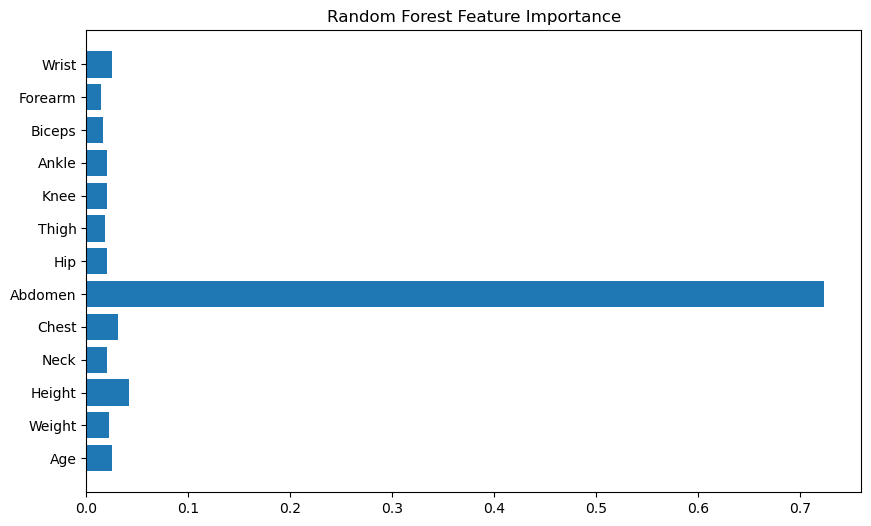

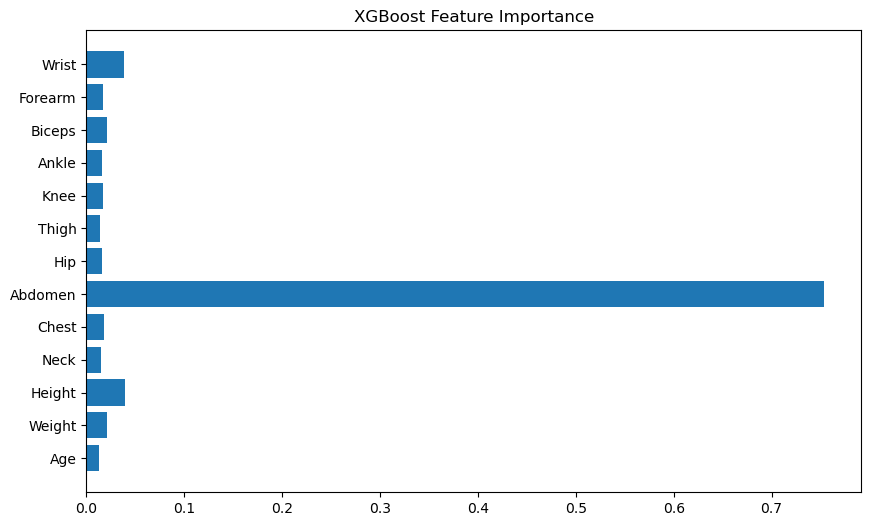

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv('bodyfat.csv')

# Remove the 'Density' column
df = df.drop(columns=['Density'])

# Define Features (X) and Target (y)
X = df.drop(columns=['BodyFat'])  # Exclude the target column
y = df['BodyFat']

# Split the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)

# Train Random Forest
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Train XGBoost
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

# Compare Results
print("Random Forest MAE:", rf_mae, "R2:", rf_r2)
print("XGBoost MAE:", xgb_mae, "R2:", xgb_r2)

# Save the Best Model
if xgb_r2 > rf_r2:
    print("XGBoost performs better. Saving XGBoost model...")
    joblib.dump(xgb_model, 'best_bodyfat_model.pkl')
else:
    print("Random Forest performs better. Saving Random Forest model...")
    joblib.dump(rf_model, 'best_bodyfat_model.pkl')

# Feature Importance Visualization
# Random Forest
rf_importance = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, rf_importance)
plt.title("Random Forest Feature Importance")
plt.show()

# XGBoost
xgb_importance = xgb_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, xgb_importance)
plt.title("XGBoost Feature Importance")
plt.show()


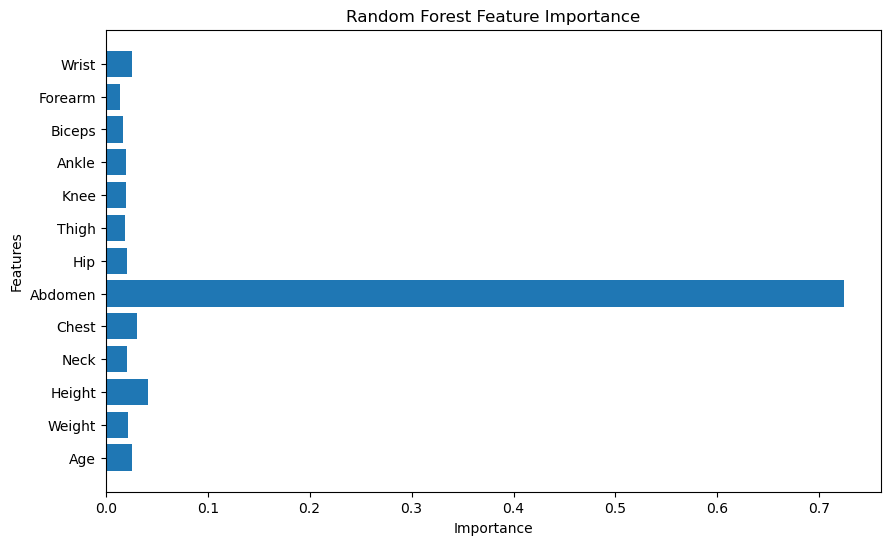

In [8]:
import matplotlib.pyplot as plt

# Feature Importance for Random Forest
rf_importance = rf_model.feature_importances_
rf_features = X.columns

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(rf_features, rf_importance)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


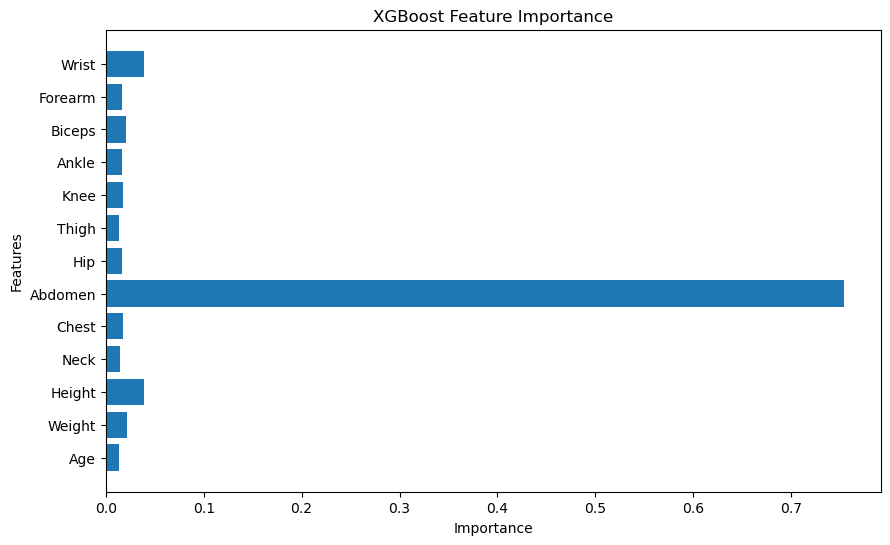

In [9]:
# Feature Importance for XGBoost
xgb_importance = xgb_model.feature_importances_
xgb_features = X.columns

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(xgb_features, xgb_importance)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
